In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df=pd.read_csv('Amazon Sale Report.csv')

/tmp/ipython-input-991315577.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Amazon Sale Report.csv')


In [70]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [71]:
print(df.describe()) #statistics for numerical column#

               index            Qty         Amount  ship-postal-code
count  128975.000000  128975.000000  121180.000000     128942.000000
mean    64487.000000       0.904431     648.561465     463966.236509
std     37232.019822       0.313354     281.211687     191476.764941
min         0.000000       0.000000       0.000000     110001.000000
25%     32243.500000       1.000000     449.000000     382421.000000
50%     64487.000000       1.000000     605.000000     500033.000000
75%     96730.500000       1.000000     788.000000     600024.000000
max    128974.000000      15.000000    5584.000000     989898.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [73]:
df.shape

(128975, 24)

# **Identifying Trends,Patterns and Anomalies**

Data Cleaning and Preparation,
Analyze Key Feature Distributions,
Explore Sales Trends Over Time,
Identify Top Categories and Locations,
Detect Anomalies and Outliers..










In [74]:
df=df.drop(['currency','ship-country','promotion-ids','Unnamed: 22'],axis=1)
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,False,NaN


In [75]:
#renaming the columns#
df=df.rename(columns={"SKU": "Stock Keeping Unit","ASIN": "Amazon Standard Identification Number","Qty": "Quantity","B2B": "Business to Business"})
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,Stock Keeping Unit,Category,Size,Amazon Standard Identification Number,Courier Status,Quantity,Amount,ship-city,ship-state,ship-postal-code,Business to Business,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,False,NaN


In [76]:
df.shape

(128975, 20)

In [77]:
#droping the Duplicate rows#
duplicate_rows_df=df[df.duplicated()]
print("number of duplicate rows:",duplicate_rows_df.shape)

number of duplicate rows: (0, 20)


In [78]:
df.count()

,0
index,128975
Order ID,128975
Date,128975
Status,128975
Fulfilment,128975
Sales Channel,128975
ship-service-level,128975
Style,128975
Stock Keeping Unit,128975
Category,128975


In [79]:
# there is no duplicate rows or data ,so its don't need to drop rows #

In [80]:
#Dropping the missing null values#
print(df.isnull().sum())

index                                        0
Order ID                                     0
Date                                         0
Status                                       0
Fulfilment                                   0
Sales Channel                                0
ship-service-level                           0
Style                                        0
Stock Keeping Unit                           0
Category                                     0
Size                                         0
Amazon Standard Identification Number        0
Courier Status                            6872
Quantity                                     0
Amount                                    7795
ship-city                                   33
ship-state                                  33
ship-postal-code                            33
Business to Business                         0
fulfilled-by                             89698
dtype: int64


In [81]:
df=df.dropna() #dropping missing values.
df.count()

,0
index,32395
Order ID,32395
Date,32395
Status,32395
Fulfilment,32395
Sales Channel,32395
ship-service-level,32395
Style,32395
Stock Keeping Unit,32395
Category,32395


 now we removes all the rows which contain the Null or N/A values

In [82]:
print(df.isnull().sum()) #after dropping the value

index                                    0
Order ID                                 0
Date                                     0
Status                                   0
Fulfilment                               0
Sales Channel                            0
ship-service-level                       0
Style                                    0
Stock Keeping Unit                       0
Category                                 0
Size                                     0
Amazon Standard Identification Number    0
Courier Status                           0
Quantity                                 0
Amount                                   0
ship-city                                0
ship-state                               0
ship-postal-code                         0
Business to Business                     0
fulfilled-by                             0
dtype: int64


In [83]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32395 entries, 1 to 128891
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   index                                  32395 non-null  int64         
 1   Order ID                               32395 non-null  object        
 2   Date                                   32395 non-null  datetime64[ns]
 3   Status                                 32395 non-null  object        
 4   Fulfilment                             32395 non-null  object        
 5   Sales Channel                          32395 non-null  object        
 6   ship-service-level                     32395 non-null  object        
 7   Style                                  32395 non-null  object        
 8   Stock Keeping Unit                     32395 non-null  object        
 9   Category                               32395 non-null  object    

In [84]:
daily_sales = df.groupby('Date')['Amount'].sum()
daily_sales.head()

,Amount
Date,
2022-03-31,10797.0
2022-04-01,159098.0
2022-04-02,154924.0
2022-04-03,198900.0
2022-04-04,192028.0


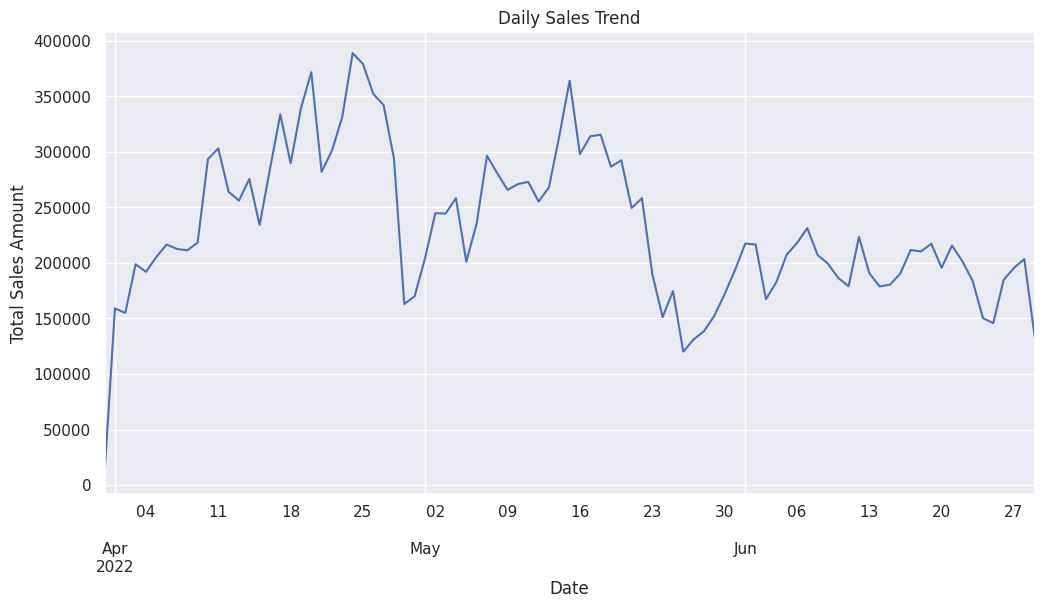

In [85]:
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

/tmp/ipython-input-4226312076.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')


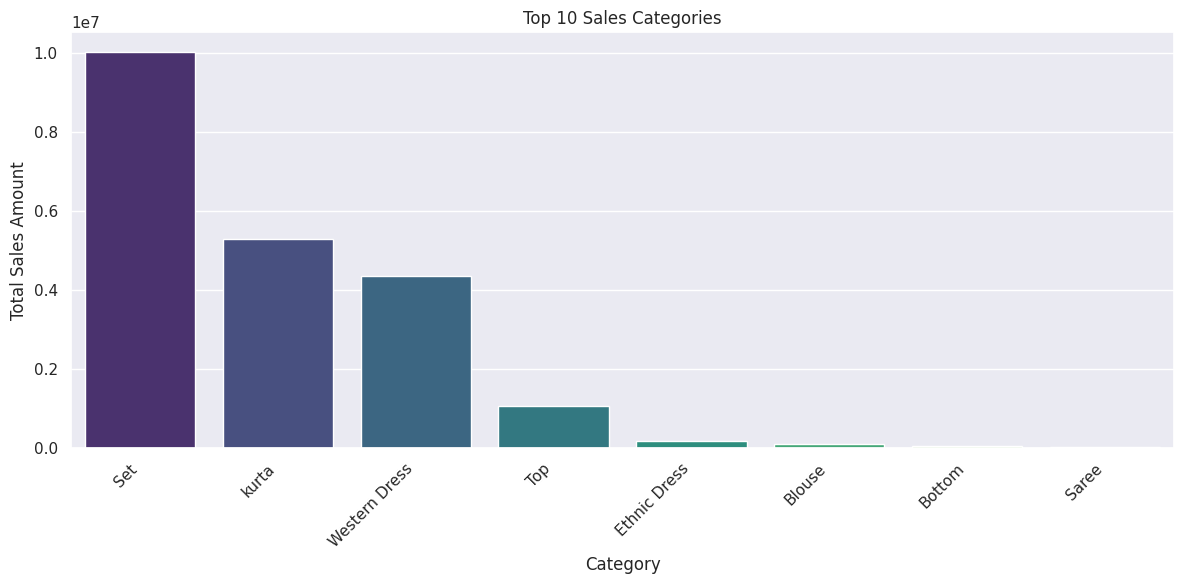

In [86]:
sales_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
top_10_categories = sales_by_category.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')
plt.title('Top 10 Sales Categories')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3212717478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='magma')


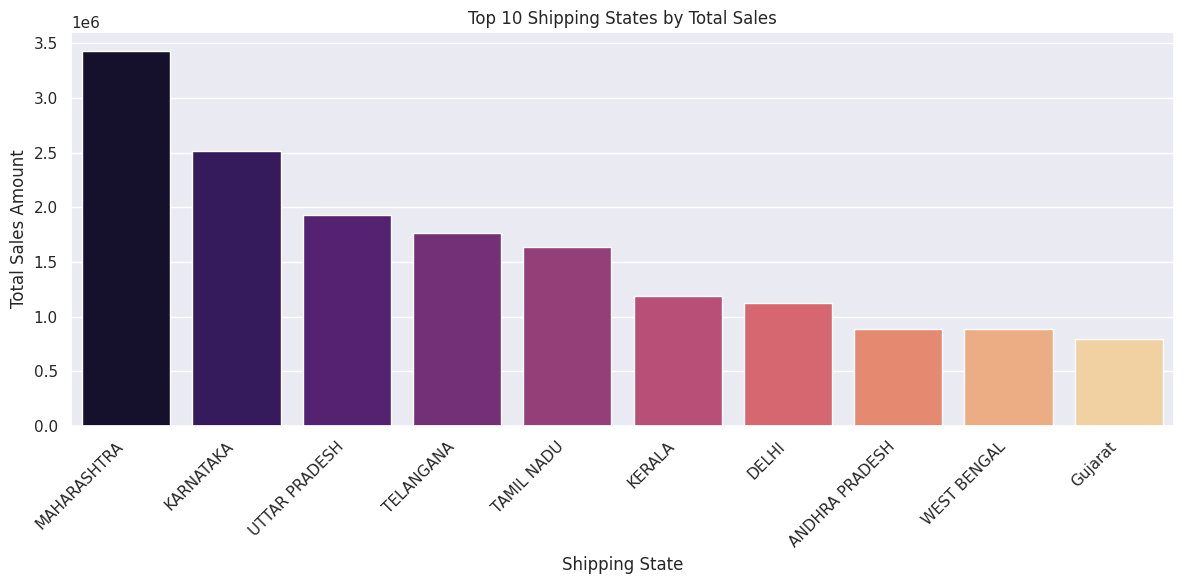

In [87]:
sales_by_state = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
top_10_states = sales_by_state.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='magma')
plt.title('Top 10 Shipping States by Total Sales')
plt.xlabel('Shipping State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#HeatMap#
Heat Maps is a type of plot which is necessary when we need to find the dependent variables.
Here amount depend on Quantity,Size and category like how many items purchased based on sizes of which category

,index,Quantity,Amount,ship-postal-code,Business to Business
index,1.000000,0.001215,0.089366,0.023699,-0.015459
Quantity,0.001215,1.000000,0.175544,-0.005267,0.030941
Amount,0.089366,0.175544,1.000000,-0.034930,0.026768
ship-postal-code,0.023699,-0.005267,-0.034930,1.000000,-0.041693
Business to Business,-0.015459,0.030941,0.026768,-0.041693,1.000000


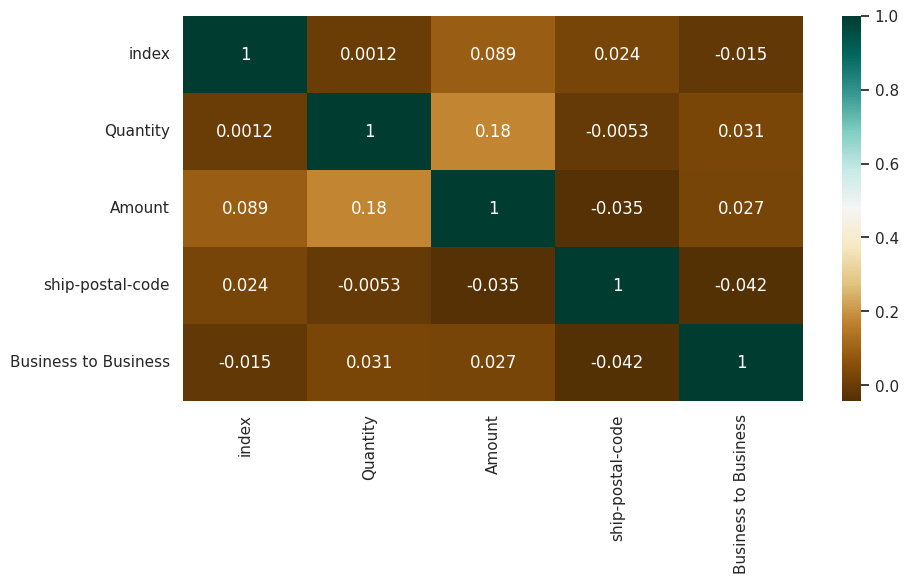

In [88]:
plt.figure(figsize=(10,5))
c = df.corr(numeric_only=True) # Calculate correlation only for numeric columns
sns.heatmap(c,cmap="BrBG",annot=True)
c

# **[Decteting Outliers
An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them.

<Axes: xlabel='Size'>

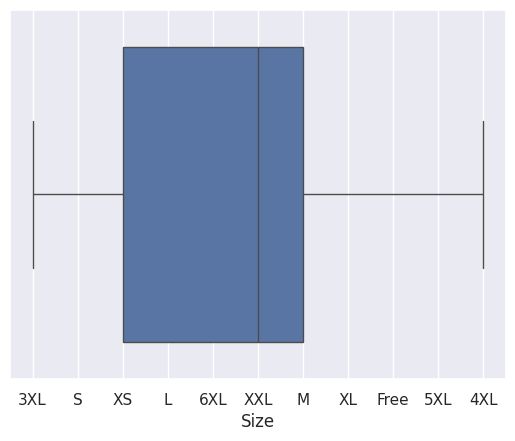

In [89]:
sns.boxplot(x=df['Size'])

<Axes: xlabel='Quantity'>

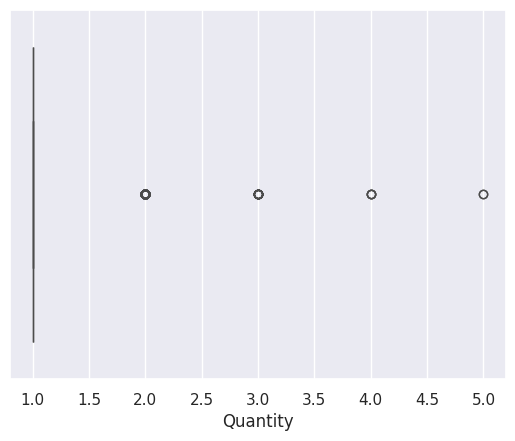

In [90]:
sns.boxplot(x=df['Quantity'])

<Axes: xlabel='Amount'>

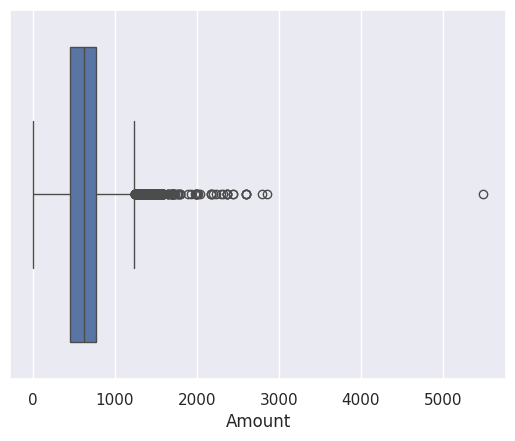

In [91]:
sns.boxplot(x=df['Amount'])

### Programmatic Outlier Detection using IQR
The Interquartile Range (IQR) method is a robust way to identify outliers. The IQR is the range between the first quartile (Q1, 25th percentile) and the third quartile (Q3, 75th percentile) of the data. Outliers are typically defined as values that fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.

In [92]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

print(f"Number of outliers in 'Amount' column: {len(outliers)}")
print("\nExamples of outliers in 'Amount':")
display(outliers.head())

# Optionally, you can remove outliers or handle them based on your analysis goals.
# For instance, to remove them:
# df_no_outliers = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]
# print(f"\nShape of DataFrame after removing outliers: {df_no_outliers.shape}")

Number of outliers in 'Amount' column: 1146

Examples of outliers in 'Amount':


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,Stock Keeping Unit,Category,Size,Amazon Standard Identification Number,Courier Status,Quantity,Amount,ship-city,ship-state,ship-postal-code,Business to Business,fulfilled-by
102,102,408-7698765-2294756,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET277,SET277-KR-NP-XXL,Set,XXL,B0983FZLXC,Shipped,1,1338.0,AMBARNATH,MAHARASHTRA,421502.0,False,Easy Ship
146,146,171-0131752-2560336,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET355,SET355-KR-PP-M,Set,M,B09RKDPHFP,Shipped,1,1399.0,BARABANKI,UTTAR PRADESH,225001.0,False,Easy Ship
637,637,406-7722012-4093964,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0385,J0385-KR-M,kurta,M,B09YYNG98D,Shipped,1,1249.0,INDORE,MADHYA PRADESH,452010.0,False,Easy Ship
955,955,402-7078622-5609155,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0285,J0285-SKD-S,Set,S,B08QGJ32WW,Shipped,1,1432.0,KOTTAYAM,KERALA,686020.0,False,Easy Ship
1317,1317,402-9576812-8867528,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0280,J0280-SKD-XXL,Set,XXL,B08QGMG4RW,Shipped,1,1556.0,THIRUVANANTHAPURAM,KERALA,695009.0,False,Easy Ship


In [93]:
Q1_qty = df['Quantity'].quantile(0.25)
Q3_qty = df['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty

# Define bounds for outliers in Quantity
lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

# Identify outliers in Quantity
outliers_qty = df[(df['Quantity'] < lower_bound_qty) | (df['Quantity'] > upper_bound_qty)]

print(f"Number of outliers in 'Quantity' column: {len(outliers_qty)}")
print("\nExamples of outliers in 'Quantity':")
display(outliers_qty.head())
print(IQR)

Number of outliers in 'Quantity' column: 128

Examples of outliers in 'Quantity':


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,Stock Keeping Unit,Category,Size,Amazon Standard Identification Number,Courier Status,Quantity,Amount,ship-city,ship-state,ship-postal-code,Business to Business,fulfilled-by
2107,2107,405-7829062-0073141,2022-04-29,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,JNE3365,JNE3365-KR-1052-A-S,kurta,S,B07WS14TZY,Shipped,3,1128.0,PALAM,MAHARASHTRA,431720.0,False,Easy Ship
3289,3289,406-3338330-9401954,2022-04-28,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-M,Western Dress,M,B09SDXTRS9,Shipped,3,2175.0,KANPUR,UTTAR PRADESH,208001.0,False,Easy Ship
6455,6455,171-9946092-6261964,2022-04-26,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3363,JNE3363-KR-1032-XXL,kurta,XXL,B07T62PKNM,Shipped,2,752.0,JALGAON,MAHARASHTRA,425003.0,False,Easy Ship
6576,6576,404-3217378-7080364,2022-04-26,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,MEN5015,MEN5015-KR-M,kurta,M,B08YYVC3WB,Shipped,2,950.0,TIRUPATI (RURAL),ANDHRA PRADESH,517502.0,False,Easy Ship
6865,6865,404-4247115-4590734,2022-04-26,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET265,SET265-KR-NP-XS,Set,XS,B0983BR8XF,Shipped,2,1776.0,GADAG BETIGERI,KARNATAKA,582101.0,False,Easy Ship


312.0


In [94]:
#Remove the outliers
df_no_outliers = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]
print(f"\nShape of DataFrame after removing outliers: {df_no_outliers.shape}")



Shape of DataFrame after removing outliers: (31249, 20)


In [95]:
df_no_outliers = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]
print(f"\nShape of DataFrame after removing outliers: {df_no_outliers.shape}")


Shape of DataFrame after removing outliers: (32395, 20)


# **Test Hypothesis and Validate assumption**


```python
# Get unique categories from the 'Category' column
unique_categories = df['Category'].unique()
print("Unique Categories:", unique_categories)

category1 = 'Set'
category2 = 'kurta'

# Extract the 'Amount' data for each of these categories
amount_category1 = df[df['Category'] == category1]['Amount']
amount_category2 = df[df['Category'] == category2]['Amount']

print(f"\nSample of 'Amount' for {category1}:\n", amount_category1.head())
print(f"\nSample of 'Amount' for {category2}:\n", amount_category2.head())
```

**Reasoning**:
First, I'll display the unique categories in the 'Category' column to confirm the available options. Then, I will filter the 'df' DataFrame to extract the 'Amount' for the 'Set' and 'kurta' categories as requested, storing them in separate variables.



In [96]:
print("Unique Categories:", df['Category'].unique())

category1 = 'Set'
category2 = 'kurta'

amount_category1 = df[df['Category'] == category1]['Amount']
amount_category2 = df[df['Category'] == category2]['Amount']

print(f"\nSample of Amount for {category1}:\n{amount_category1.head()}")
print(f"\nSample of Amount for {category2}:\n{amount_category2.head()}")

Unique Categories: ['kurta' 'Set' 'Bottom' 'Western Dress' 'Top' 'Blouse' 'Ethnic Dress'
 'Saree']

Sample of Amount for Set:
14     771.0
25     582.0
32    1233.0
60     599.0
72     631.0
Name: Amount, dtype: float64

Sample of Amount for kurta:
1     406.0
7     399.0
12    399.0
15    544.0
18    458.0
Name: Amount, dtype: float64


**Reasoning**:
To perform an independent samples t-test, I will import the `ttest_ind` function from `scipy.stats`, apply it to the `amount_category1` and `amount_category2` Series, and print the resulting t-statistic and p-value.



In [97]:
from scipy.stats import ttest_ind

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(amount_category1, amount_category2)

print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3e}")

T-statistic: 117.145
P-value: 0.000e+00


In [98]:
from scipy.stats import shapiro

# Shapiro-Wilk test for category1
statistic1, p_value1 = shapiro(amount_category1)
print(f"Shapiro-Wilk Test for {category1} (Amount):")
print(f"  W-statistic: {statistic1:.3f}")
print(f"  P-value: {p_value1:.3e}")

# Shapiro-Wilk test for category2
statistic2, p_value2 = shapiro(amount_category2)
print(f"\nShapiro-Wilk Test for {category2} (Amount):")
print(f"  W-statistic: {statistic2:.3f}")
print(f"  P-value: {p_value2:.3e}")

alpha = 0.05
print(f"\nInterpretation (alpha = {alpha}):")
if p_value1 < alpha:
    print(f"  For {category1}: Reject H0. Data is not normally distributed.")
else:
    print(f"  For {category1}: Fail to reject H0. Data appears normally distributed.")

if p_value2 < alpha:
    print(f"  For {category2}: Reject H0. Data is not normally distributed.")
else:
    print(f"  For {category2}: Fail to reject H0. Data appears normally distributed.")

Shapiro-Wilk Test for Set (Amount):
  W-statistic: 0.938
  P-value: 4.750e-57

Shapiro-Wilk Test for kurta (Amount):
  W-statistic: 0.896
  P-value: 3.055e-66

Interpretation (alpha = 0.05):
  For Set: Reject H0. Data is not normally distributed.
  For kurta: Reject H0. Data is not normally distributed.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12106.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11656.
  res = hypotest_fun_out(*samples, **kwds)


**Reasoning**:
As instructed, I will apply Levene's test to the 'Amount' data for both categories to check the homogeneity of variance, then print and interpret the results.



In [99]:
from scipy.stats import levene

# Perform Levene's test for homogeneity of variances
statistic_levene, p_value_levene = levene(amount_category1, amount_category2)

print(f"\nLevene's Test for Homogeneity of Variances:")
print(f"  Test Statistic: {statistic_levene:.3f}")
print(f"  P-value: {p_value_levene:.3e}")

alpha = 0.05
print(f"\nInterpretation (alpha = {alpha}):")
if p_value_levene < alpha:
    print(f"  Reject H0. Variances are significantly different. The assumption of homogeneity of variances is violated.")
else:
    print(f"  Fail to reject H0. Variances appear to be equal. The assumption of homogeneity of variances holds.")


Levene's Test for Homogeneity of Variances:
  Test Statistic: 2990.081
  P-value: 0.000e+00

Interpretation (alpha = 0.05):
  Reject H0. Variances are significantly different. The assumption of homogeneity of variances is violated.


**Reasoning**:
To visually assess the normality of the 'Amount' data for each category, I will generate histograms and Q-Q plots, as instructed. This will help us understand the distribution shape and identify any deviations from normality.



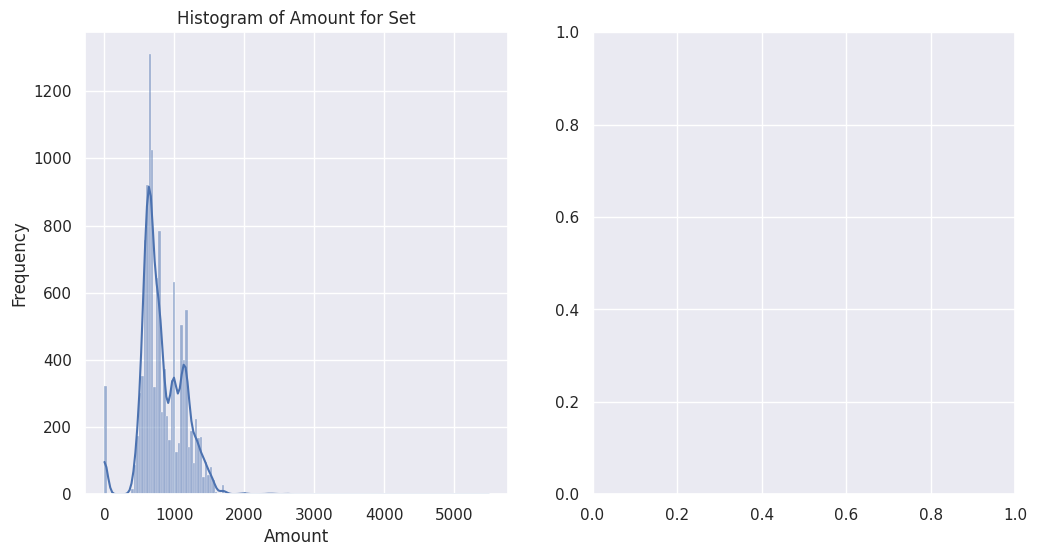

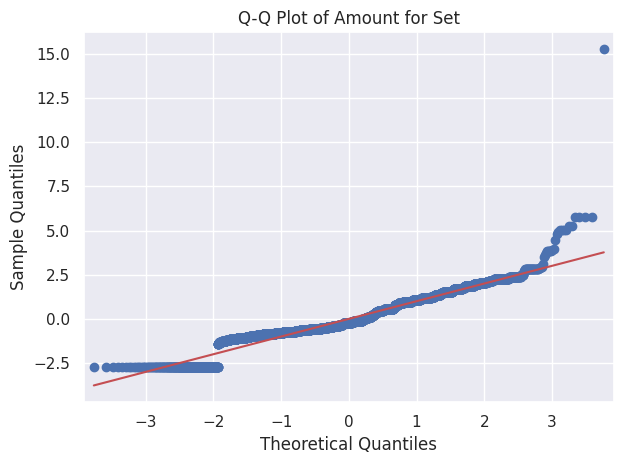

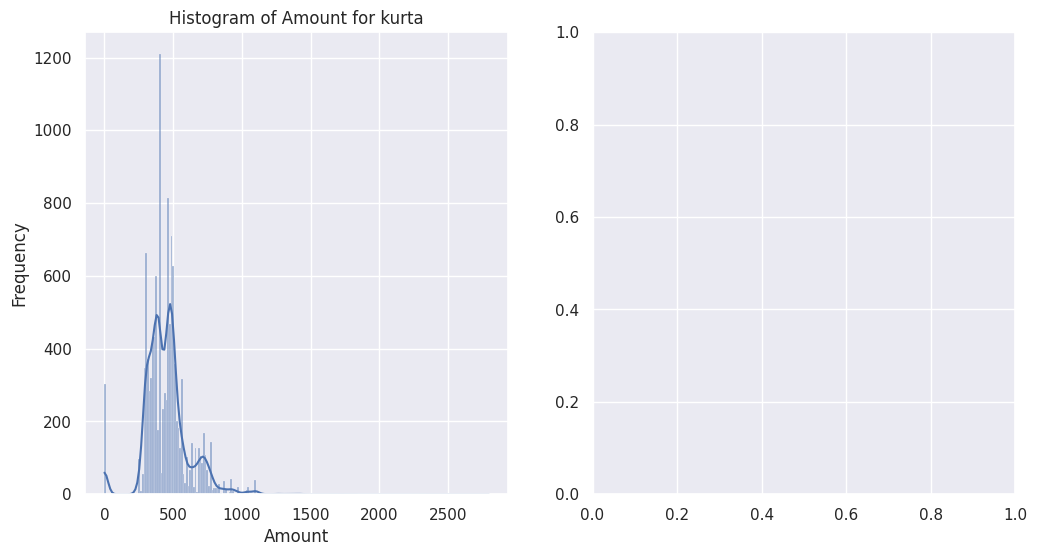

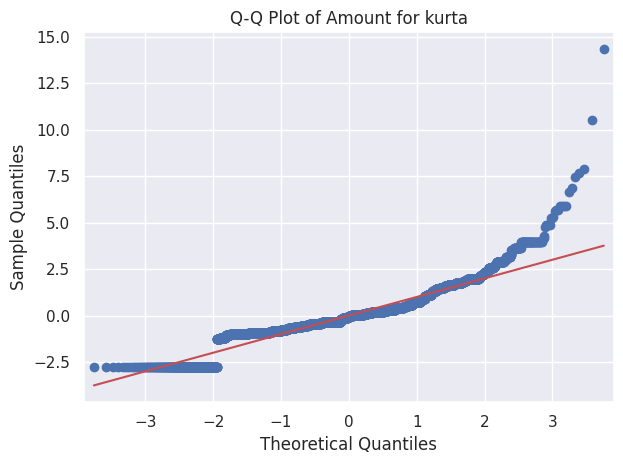

In [100]:
import statsmodels.api as sm

# Visualizing normality for category1 ('Set')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(amount_category1, kde=True)
plt.title(f'Histogram of Amount for {category1}')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sm.qqplot(amount_category1, line='s', fit=True)
plt.title(f'Q-Q Plot of Amount for {category1}')
plt.tight_layout()
plt.show()

# Visualizing normality for category2 ('kurta')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(amount_category2, kde=True)
plt.title(f'Histogram of Amount for {category2}')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sm.qqplot(amount_category2, line='s', fit=True)
plt.title(f'Q-Q Plot of Amount for {category2}')
plt.tight_layout()
plt.show()


**Reasoning**:
To visually assess the homogeneity of variances, I will create a temporary DataFrame by concatenating the 'Amount' data for 'Set' and 'kurta' categories, assigning appropriate labels, and then generate a box plot.



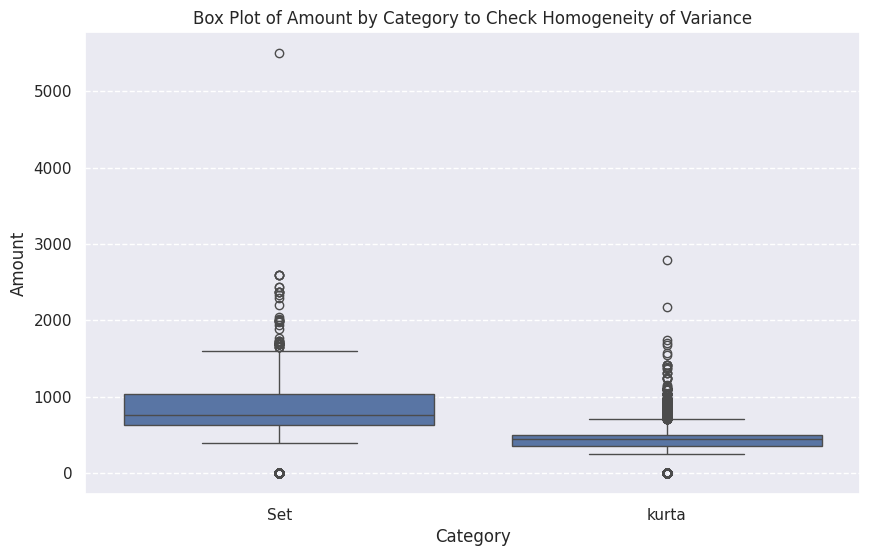

In [101]:
# Create a DataFrame for visualization
df_viz = pd.DataFrame({
    'Amount': pd.concat([amount_category1, amount_category2]),
    'Category': [category1] * len(amount_category1) + [category2] * len(amount_category2)
})

# Generate the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Amount', data=df_viz)
plt.title('Box Plot of Amount by Category to Check Homogeneity of Variance')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.grid(axis='y', linestyle='--')
plt.show()